# The Master Manual: EDA for Chinook Music Store

EDA practice here.

## Step 1: Import Libraries

Here we import the libraries we need for EDA. **Pandas** is for data manipulation, **NumPy** for numerical operations, and **Matplotlib/Seaborn** for visualization.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

print("Libraries imported successfully!")

Libraries imported successfully!


## Phase 1: The "Store Layout" **(Data Inspection)**
Before analyzing, you must understand the connections **(Schema).**
The Table Map:
# Action: Use df.info() on every table.
The Concept: Identify the "Core" tables.
Fact Tables: Invoice and InvoiceLine (Where the money is).
Dimension Tables: Customer, Track, Artist (Who and What).
Key Relationships:
The Question: How do I get from an Artist to a Sale?
The Path: **Artist → Album → Track → InvoiceLine → Invoice.**
## Data Types Check:
The Trap: Ensure InvoiceDate is a Datetime object in Python, not a string. If it's a string, you can't do time-based EDA!

In [6]:


# Connect to the SQLite database
conn = sqlite3.connect('Chinook.db')

# Get list of all tables
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in database:")
for table in tables:
    print(f"  - {table[0]}")

# Example: Load the Customer table
df_customers = pd.read_sql_query("SELECT * FROM Customer LIMIT 16;", conn)
print("\nFirst 16 customers:")
print(df_customers)
print(f"\nShape: {df_customers.shape}")
print(df_customers.info())

Tables in database:
  - Album
  - Artist
  - Customer
  - Employee
  - Genre
  - Invoice
  - InvoiceLine
  - MediaType
  - Playlist
  - PlaylistTrack
  - Track

First 16 customers:
    CustomerId  FirstName     LastName  \
0            1       Luís    Gonçalves   
1            2     Leonie       Köhler   
2            3   François     Tremblay   
3            4      Bjørn       Hansen   
4            5  František  Wichterlová   
5            6     Helena         Holý   
6            7     Astrid       Gruber   
7            8       Daan      Peeters   
8            9       Kara      Nielsen   
9           10    Eduardo      Martins   
10          11  Alexandre        Rocha   
11          12    Roberto      Almeida   
12          13   Fernanda        Ramos   
13          14       Mark      Philips   
14          15   Jennifer     Peterson   
15          16      Frank       Harris   

                                             Company  \
0   Embraer - Empresa Brasileira de Aeronáutica 

In [ ]:
#Checking for nulls, whether data is lying to me or not
print("\nNull values in Customer table:")
print(df_customers.isnull().sum())

#checking for nulls in tracks table
df_tracks = pd.read_sql_query(("SELECT * from Track;"),conn)


#finding the duplicates in the track table
print("\nDuplicates in the track:", df_tracks.duplicated().sum())

#finding duplicates in customer table
print("\n Duplicates in customer table:", df_customers.duplicated().sum())

#checking the datatypes of track table
print("datatypes of track table:\n", df_tracks.dtypes)


Null values in Customer table:
CustomerId      0
FirstName       0
LastName        0
Company         8
Address         0
City            0
State           7
Country         0
PostalCode      0
Phone           0
Fax             7
Email           0
SupportRepId    0
dtype: int64
null values in track: TrackId           0
Name              0
AlbumId           0
MediaTypeId       0
GenreId           0
Composer        977
Milliseconds      0
Bytes             0
UnitPrice         0
dtype: int64

Duplicates in the track: 0

 Duplicates in customer table: 0
datatypes of track table:
 TrackId           int64
Name                str
AlbumId           int64
MediaTypeId       int64
GenreId           int64
Composer            str
Milliseconds      int64
Bytes             int64
UnitPrice       float64
dtype: object


The Two Branches of Univariate Analysis
You must treat Numbers (Continuous) and Labels (Categorical) differently.
Branch A: Numerical Variables (The "Measuring" Vitals)
Examples: Salary, Age, Blood Pressure, Temperature, Distance.
Central Tendency: Where is the middle? (Mean, Median, Mode).
Dispersion: How spread out is the data? (Standard Deviation, Variance, Range).
Shape: Is it a bell curve? Is it slanted (Skewness)?
Outliers: Are there "impossible" numbers (e.g., Age = 500)?
Branch B: Categorical Variables (The "Counting" Vitals)
Examples: Gender, City, Car Model, Job Title, Genre.
Frequency: How many people are in each group?
Proportion: What percentage of the total does this group represent? (e.g., 60% are Male).
Balance: Is one group dominating the whole dataset?

count    16.000000
mean      8.500000
std       4.760952
min       1.000000
25%       4.750000
50%       8.500000
75%      12.250000
max      16.000000
Name: CustomerId, dtype: float64

Total count of customers: City
Prague                 2
São Paulo              2
São José dos Campos    1
Stuttgart              1
Montréal               1
Oslo                   1
Vienne                 1
Brussels               1
Copenhagen             1
Rio de Janeiro         1
Brasília               1
Edmonton               1
Vancouver              1
Mountain View          1
Name: count, dtype: int64


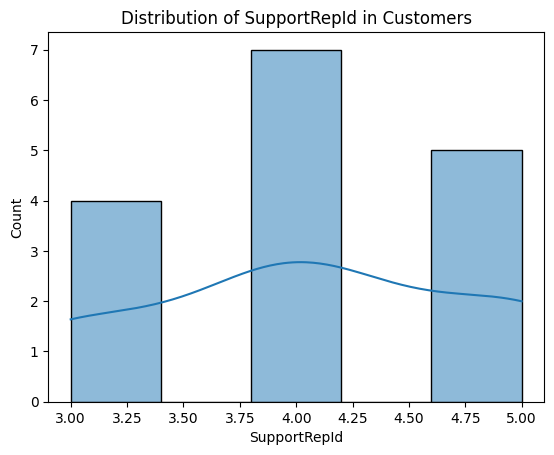

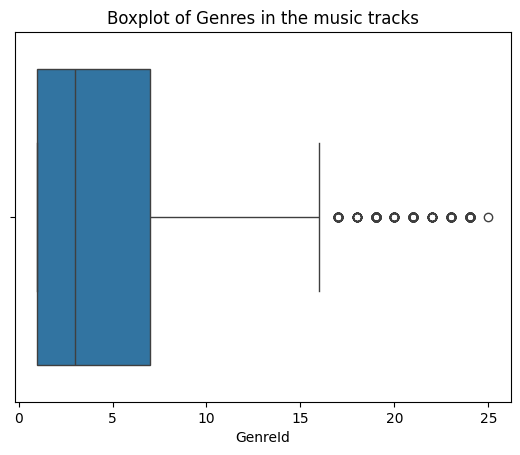

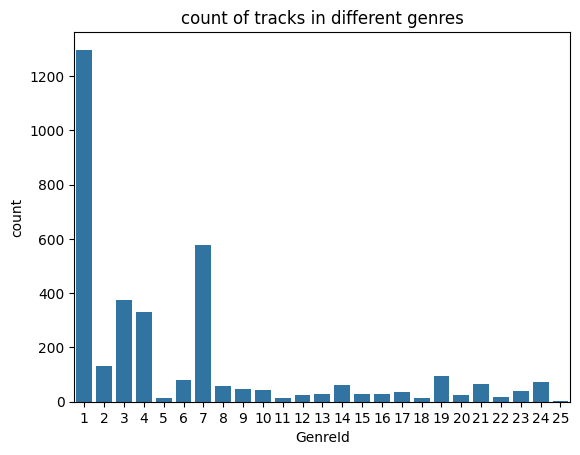

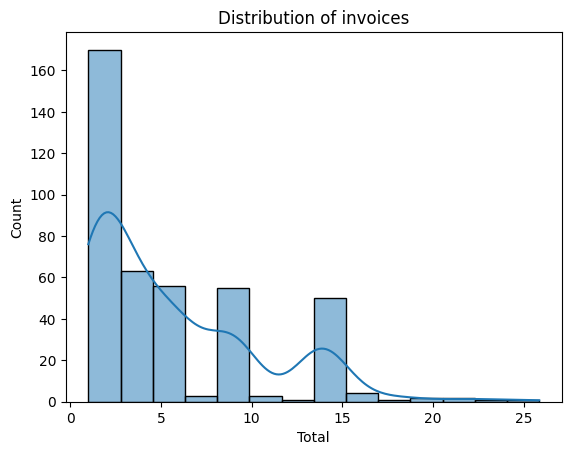


Percentage of the customer in different citites: City
Prague                 12.50
São Paulo              12.50
São José dos Campos     6.25
Stuttgart               6.25
Montréal                6.25
Oslo                    6.25
Vienne                  6.25
Brussels                6.25
Copenhagen              6.25
Rio de Janeiro          6.25
Brasília                6.25
Edmonton                6.25
Vancouver               6.25
Mountain View           6.25
Name: proportion, dtype: float64


In [33]:
# Using describe(), returns the statistics
print(df_customers['CustomerId'].describe())

# using total_count for frequency
print("\nTotal count of customers:", df_customers['City'].value_counts())

# Histogram for a valid numerical column in customers (e.g., SupportRepId)
# Change 'SupportRepId' to another column if you want to plot a different one
sns.histplot(df_customers['SupportRepId'], kde=True)
plt.title('Distribution of SupportRepId in Customers')
plt.show()
#boxplot (the outliers)
sns.boxplot(x=df_tracks['GenreId'])
plt.title("Boxplot of Genres in the music tracks")
plt.show()

#countplot(barchart) visualisationo
sns.countplot(x=df_tracks['GenreId'], data=df_tracks)
plt.title("count of tracks in different genres")
plt.show()

df_invoices = pd.read_sql_query("SELECT * from Invoice;", conn)
#ditribution of invoice total in invoice table
sns.histplot(df_invoices['Total'], kde=True)
plt.title("Distribution of invoices")
plt.show()


#percetange(proportions)of customer in different cities

print("\nPercentage of the customer in different citites:",df_customers['City'].value_counts(normalize=True)* 100)

## Bivariate analysis
 the heart of discovery. In Univariate analysis, you looked at the "bones." In Bivariate, you look at how the muscles move the bones.

The Three "Battlegrounds" of Bivariate Analysis
Depending on what you are comparing, you use different tools. In a $100k interview, you must distinguish between these:

| Type | Combination | Tool (Python) | Goal |
|---|---|---|---|
| Type A | Numerical vs. Numerical | `sns.scatterplot()` | Find **Correlation** (Do they move together?) |
| Type B | Numerical vs. Categorical | `sns.barplot()` or `sns.boxplot()` | Find **Comparison** (Does the group change the value?) |
| Type C | Categorical vs. Categorical | `pd.crosstab()` & `sns.heatmap()` | Find **Dependency** (Is one group related to another?) |

Tool 1: Scatter Plots (Numerical vs. Numerical)
Use this to see if "Price" affects "Quantity"

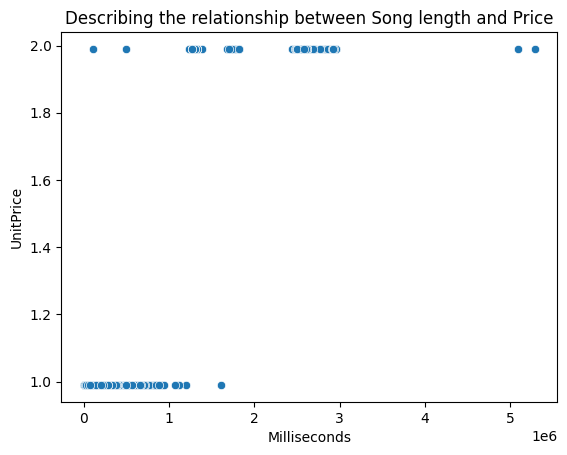

In [ ]:
#"price" affects "Quantity"
#Price(expensive) - Unitprice
#"Quantity" - duration of the track purchased , can be seconds, millisecinds etc
#both are numerical values, so we can use scatter plot to visualise the relationship
sns.scatterplot(x='Milliseconds', y='UnitPrice', data=df_tracks)
plt.title("Describing the relationship between Song length and Price")
plt.show()


- **Observation:** There is **Zero Correlation** between song length and price.
- **Business Meaning:** The music store does not charge by the minute. A 1-minute song costs the same as a 10-minute song ($0.99).
- **The "Outliers":** See those dots at $1.99? In the Chinook database, those are usually **TV Show episodes** or **Videos**, not songs.

**Tool 2: Box Plots (Numerical vs. Categorical)**
Use this to see the "Spread" of money across groups.

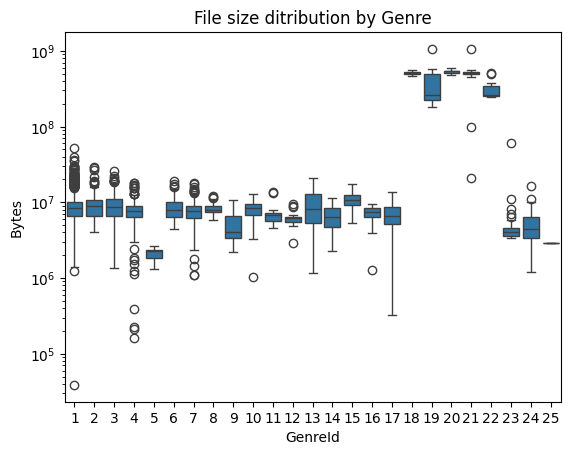

In [43]:
# Spread of money - file size(Bytes)
# Groups - Genres which can be mentioned with GenreID
df_genres = pd.read_sql_query("SELECT * from Genre;", conn)

sns.boxplot(x='GenreId', y='Bytes', data=df_tracks)
plt.yscale('log')
plt.title("File size ditribution by Genre")
plt.show()

In [45]:
print("\nFirst 16 tracks:"  )
print(df_tracks.head(16))


First 16 tracks:
    TrackId                                     Name  AlbumId  MediaTypeId  \
0         1  For Those About To Rock (We Salute You)        1            1   
1         2                        Balls to the Wall        2            2   
2         3                          Fast As a Shark        3            2   
3         4                        Restless and Wild        3            2   
4         5                     Princess of the Dawn        3            2   
5         6                    Put The Finger On You        1            1   
6         7                          Let's Get It Up        1            1   
7         8                         Inject The Venom        1            1   
8         9                               Snowballed        1            1   
9        10                               Evil Walks        1            1   
10       11                                   C.O.D.        1            1   
11       12                       Breaking The

**Compare two variables to find relationships**
. This is where the money is.
Conceptual Goal: Which Genre makes the most money? Which Employee handles the most customers?

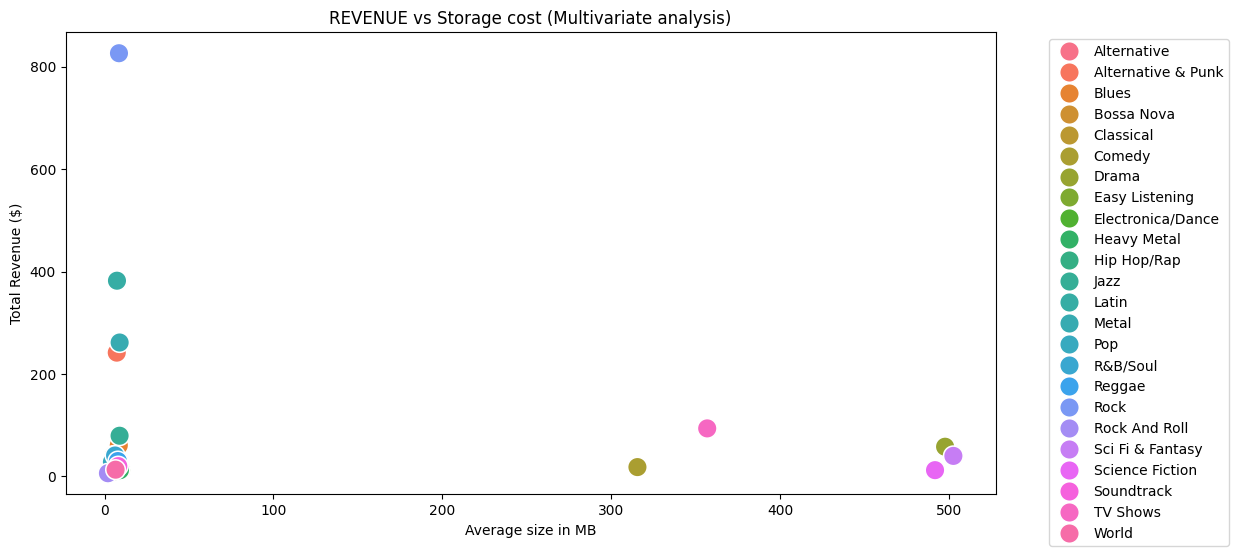

In [48]:
# 1. Join Invoices and Tracks to see Revenue vs Bytes
# 1024*1-24 = to calculate in mb
query ="""
SELECT g.name as Genre, 
SUM(il.UnitPrice * il.Quantity) as TotalRevenue,
AVG(t.Bytes)/(1024.0*1024.0) as AvgsizeMB 
FROM Genre g
JOIN Track t ON g.GenreId = t.GenreId
JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY g.name
"""
df_profits = pd.read_sql_query(query, conn)

#2.Visualisation scatterplot
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_profits, x='AvgsizeMB', y='TotalRevenue', hue='Genre', s=200)
plt.title("REVENUE vs Storage cost (Multivariate analysis)")
plt.xlabel("Average size in MB")
plt.ylabel("Total Revenue ($)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


